## Weather Observations
* Temperature increases in cities closer to the Equator (latitude 0).

* There doesn't seem to be a strong correlation between latitude with the other variables (cloudiness, humidity, and wind speed).

* One might conclude that wind speed increases the further a city is from the Equator. 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

619
619


In [8]:
# create dataframe
city_df = pd.DataFrame(
    {"City": cities,
     "Country": countries
    })

city_df.head()

# create sample size of 500
city500 = city_df.sample(500)

# reset index
city500 = city500.reset_index(drop=True)
city500.head(10)

,City,Country
0,lisala,cd
1,tiksi,ru
2,iquique,cl
3,quaregnon,be
4,malino,ru
5,flinders,au
6,catuday,ph
7,acari,pe
8,khuzhir,ru
9,kracheh,kh


In [9]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

## Perform API Calls

In [10]:

city = []
country = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
count = 0

for index,row in city500.iterrows():
    query_url = url + "&q=" + row["City"]
    count +=1
    print(f"Processing record {count} for the city: {row['City']}")
    response = requests.get(query_url).json()
    if response["cod"] == "404":
        print("Data not found... skip.")
        
    else:
        print(f"Record found for the city: {row['City']}")
        city.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        

Processing record 1 for the city: lisala
Record found for the city: lisala
Processing record 2 for the city: tiksi
Record found for the city: tiksi
Processing record 3 for the city: iquique
Record found for the city: iquique
Processing record 4 for the city: quaregnon
Record found for the city: quaregnon
Processing record 5 for the city: malino
Record found for the city: malino
Processing record 6 for the city: flinders
Record found for the city: flinders
Processing record 7 for the city: catuday
Record found for the city: catuday
Processing record 8 for the city: acari
Record found for the city: acari
Processing record 9 for the city: khuzhir
Record found for the city: khuzhir
Processing record 10 for the city: kracheh
Data not found... skip.
Processing record 11 for the city: maniitsoq
Record found for the city: maniitsoq
Processing record 12 for the city: salantai
Record found for the city: salantai
Processing record 13 for the city: kupang
Record found for the city: kupang
Processi

Record found for the city: spirit river
Processing record 107 for the city: gonbad-e qabus
Record found for the city: gonbad-e qabus
Processing record 108 for the city: pochutla
Record found for the city: pochutla
Processing record 109 for the city: mount isa
Record found for the city: mount isa
Processing record 110 for the city: leningradskiy
Record found for the city: leningradskiy
Processing record 111 for the city: erzin
Record found for the city: erzin
Processing record 112 for the city: constitucion
Record found for the city: constitucion
Processing record 113 for the city: alice springs
Record found for the city: alice springs
Processing record 114 for the city: rostock
Record found for the city: rostock
Processing record 115 for the city: ribeira grande
Record found for the city: ribeira grande
Processing record 116 for the city: ilo
Record found for the city: ilo
Processing record 117 for the city: vaitupu
Data not found... skip.
Processing record 118 for the city: rawannawi


Record found for the city: hohoe
Processing record 209 for the city: khatanga
Record found for the city: khatanga
Processing record 210 for the city: iqaluit
Record found for the city: iqaluit
Processing record 211 for the city: bandarbeyla
Record found for the city: bandarbeyla
Processing record 212 for the city: ostrovnoy
Record found for the city: ostrovnoy
Processing record 213 for the city: ampanihy
Record found for the city: ampanihy
Processing record 214 for the city: bathsheba
Record found for the city: bathsheba
Processing record 215 for the city: tommot
Record found for the city: tommot
Processing record 216 for the city: kruisfontein
Record found for the city: kruisfontein
Processing record 217 for the city: lebu
Record found for the city: lebu
Processing record 218 for the city: chicama
Record found for the city: chicama
Processing record 219 for the city: forecariah
Record found for the city: forecariah
Processing record 220 for the city: blyth
Record found for the city: b

Record found for the city: severobaykalsk
Processing record 313 for the city: tabialan
Data not found... skip.
Processing record 314 for the city: keti bandar
Record found for the city: keti bandar
Processing record 315 for the city: avarua
Record found for the city: avarua
Processing record 316 for the city: smithers
Record found for the city: smithers
Processing record 317 for the city: lasa
Record found for the city: lasa
Processing record 318 for the city: saint-joseph
Record found for the city: saint-joseph
Processing record 319 for the city: sakakah
Data not found... skip.
Processing record 320 for the city: ulladulla
Record found for the city: ulladulla
Processing record 321 for the city: takapau
Record found for the city: takapau
Processing record 322 for the city: shelburne
Record found for the city: shelburne
Processing record 323 for the city: sarkand
Record found for the city: sarkand
Processing record 324 for the city: arica
Record found for the city: arica
Processing reco

Record found for the city: college
Processing record 415 for the city: moyale
Record found for the city: moyale
Processing record 416 for the city: ushuaia
Record found for the city: ushuaia
Processing record 417 for the city: whitehorse
Record found for the city: whitehorse
Processing record 418 for the city: grand centre
Data not found... skip.
Processing record 419 for the city: bambous virieux
Record found for the city: bambous virieux
Processing record 420 for the city: tombouctou
Record found for the city: tombouctou
Processing record 421 for the city: luwuk
Record found for the city: luwuk
Processing record 422 for the city: hilo
Record found for the city: hilo
Processing record 423 for the city: touros
Record found for the city: touros
Processing record 424 for the city: san miguel
Record found for the city: san miguel
Processing record 425 for the city: safwah
Data not found... skip.
Processing record 426 for the city: qaanaaq
Record found for the city: qaanaaq
Processing reco

In [11]:
# Run count to see how many records were found
len(city)

450

In [12]:
# Create dataframe
weather_dict = {
    "City": city,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)": temp,
    "Humidity (%)": humid,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wind
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Lisala,CD,2.15,21.52,73.82,94,80,2.73
1,Tiksi,RU,71.64,128.87,35.39,98,92,5.75
2,Iquique,CL,-20.22,-70.14,62.60,77,75,9.17
3,Quaregnon,BE,50.44,3.86,45.91,100,20,5.82
4,Malino,RU,55.11,38.18,41.00,93,0,8.95
5,Flinders,AU,-34.58,150.85,57.20,62,75,16.11
6,Catuday,PH,16.29,119.81,84.17,100,8,3.18
7,Acari,BR,-6.44,-36.64,70.58,85,12,9.33
8,Khuzhir,RU,53.19,107.35,53.66,77,0,5.53
9,Maniitsoq,GL,65.42,-52.90,40.43,78,20,21.18


In [13]:
weather_data.to_csv("citiesweather.csv", index=False, header=True)

<function matplotlib.pyplot.show(*args, **kw)>

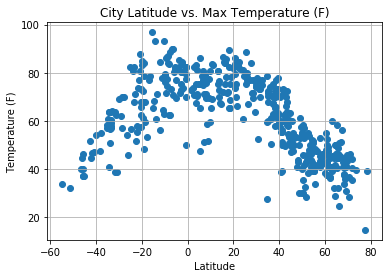

In [14]:
plt.scatter(weather_data["Latitude"],weather_data["Temperature (F)"], marker = "o")

plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.savefig("LatitudevsTemperature.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

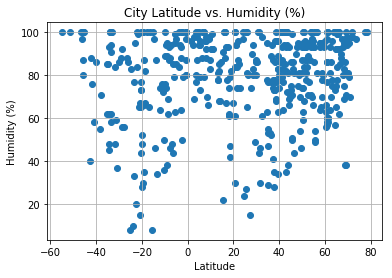

In [15]:
plt.scatter(weather_data["Latitude"],weather_data["Humidity (%)"], marker = "o")

plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("LatitudevsHumidity.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

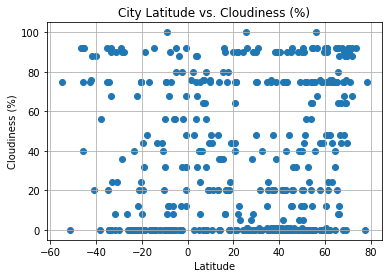

In [16]:
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness (%)"], marker = "o")

plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("LatitudevsCloudiness.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

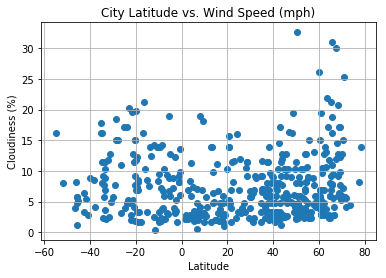

In [17]:
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed (mph)"], marker = "o")

plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("LatitudevsWindspeed.png")
plt.show